In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score)

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


 To check the null values

In [4]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Information of the data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


 Descriptive statistics 

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Seperate the independent and target variable

In [7]:
x=df.drop("Outcome",axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [8]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

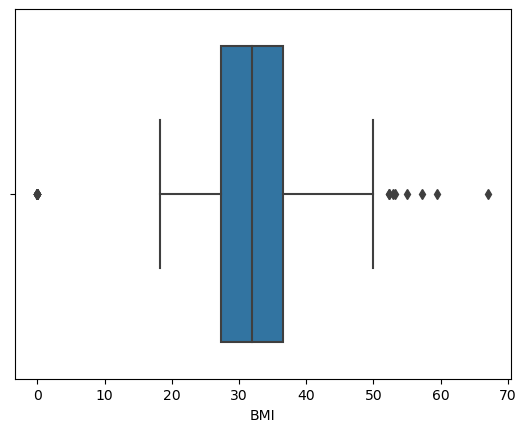

In [9]:
sns.boxplot(df["BMI"])

To check the outliers and treat them for better accuracy

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [11]:
mask=((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))
df[mask]=np.nan

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

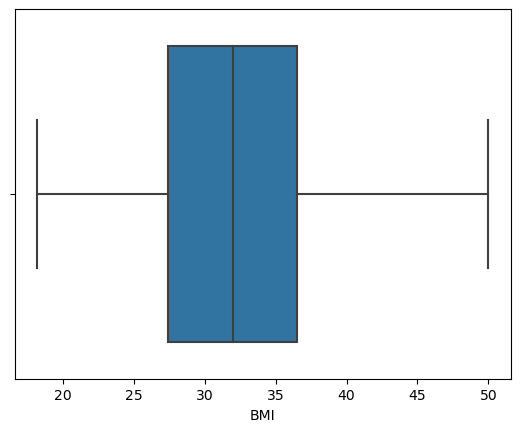

In [12]:
sns.boxplot(df["BMI"])

Divide the data into train, test and split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

Normalise the data by standard scaler method

In [14]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# KNN Model

 Fit the KNN Model

In [15]:
model=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [16]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

 Predict the outcomes

In [16]:
#model.predict(x_train)

In [17]:
#model.predict(x_test)

In [17]:
y_pred = model.predict(x_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f1)

0.6914783447192091


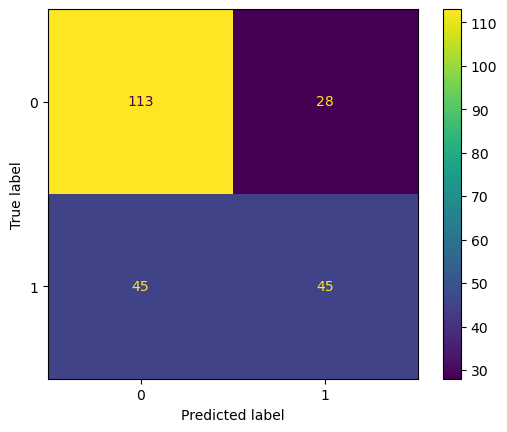

In [19]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

To check the accuracy 

In [20]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8435754189944135
0.683982683982684


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

 Model is overfitted

In [21]:
pred=model.predict([[148,64,23,112,23.5,0.657,60]])
pred

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)

# Naive Bayes  

In [26]:
model2=GaussianNB()

In [27]:
model2.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred = model2.predict(x_test)

In [29]:
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.7746741154562383
0.7445887445887446


In [30]:

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

F1 Score: 0.7572067491575168


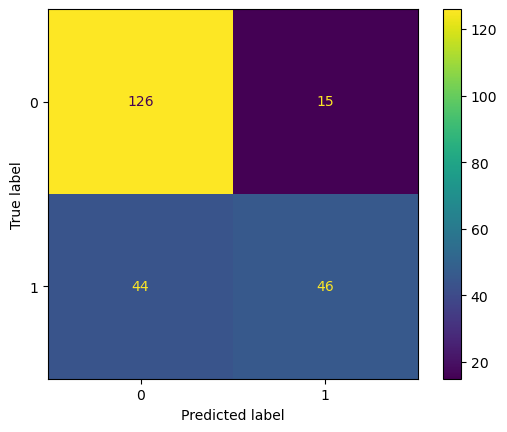

In [31]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();